#Autoencoders:
Autoencoders are a type of neural network designed for unsupervised learning and data compression. They consist of an encoder network that compresses the input data into a latent space representation and a decoder network that reconstructs the input from this representation. Variants like Variational Autoencoders (VAEs) are used for tasks like image generation, denoising, and dimensionality reduction.

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
188/188 [==============================] - 12s 44ms/step - loss: 0.2441 - val_loss: 0.1592
Epoch 2/50
188/188 [==============================] - 3s 18ms/step - loss: 0.1376 - val_loss: 0.1235
Epoch 3/50
188/188 [==============================] - 3s 15ms/step - loss: 0.1146 - val_loss: 0.1087
Epoch 4/50
188/188 [==============================] - 3s 15ms/step - loss: 0.1041 - val_loss: 0.1020
Epoch 5/50
188/188 [==============================] - 3s 18ms/step - loss: 0.0989 - val_loss: 0.0982
Epoch 6/50
188/188 [==============================] - 3s 18ms/step - loss: 0.0955 - val_loss: 0.0948
Epoch 7/50
188/188 [==============================] - 3s 15ms/step - loss: 0.0928 - val_loss: 0.0924
Epoch 8/50
188/188 [==============================] - 3s 15ms/step - loss: 0.0906 - val_loss: 0.0903
Epoch 9/50
188/188 [==============================] - 3s 18ms/step - loss: 0.0887 - val_loss: 0.0886
Epoch 10/50
188/188 [====

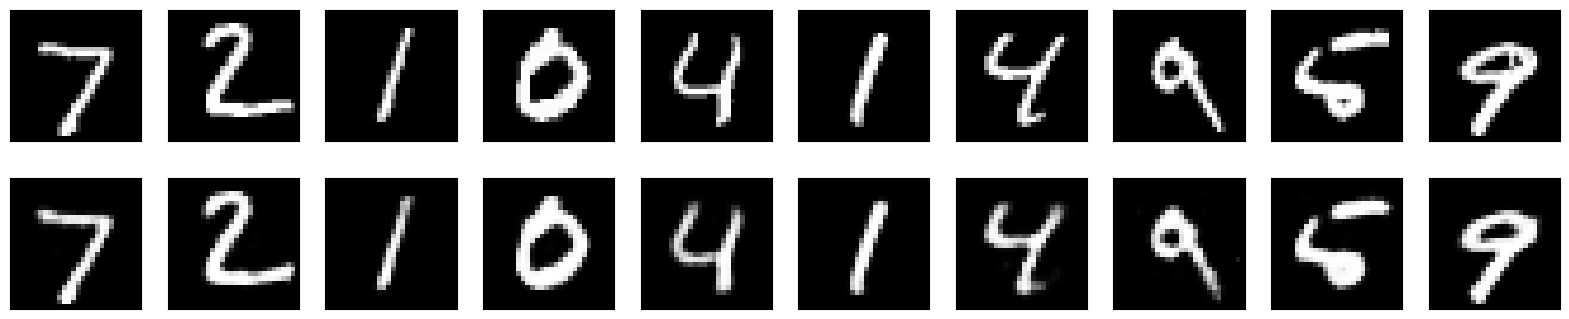

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images into 784-dimensional vectors (28x28)
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Define the dimensions for encoding
encoding_dim = 64  # This is the size of the encoded representations

# Input layer
input_img = Input(shape=(784,))

# Encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer, sigmoid for [0,1] output range

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Encode and decode some digits
encoded_imgs = autoencoder.predict(X_test)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#1. Deep Fully Connected Autoencoder
#2. Convolutional Autoencoder
#3. Denoising Autoencoder

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 784)               1011

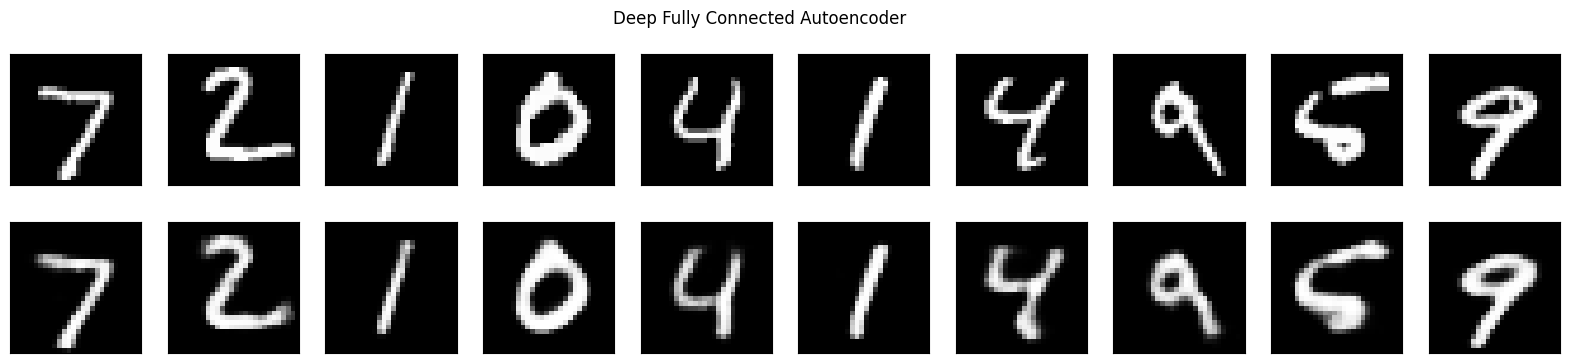

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320

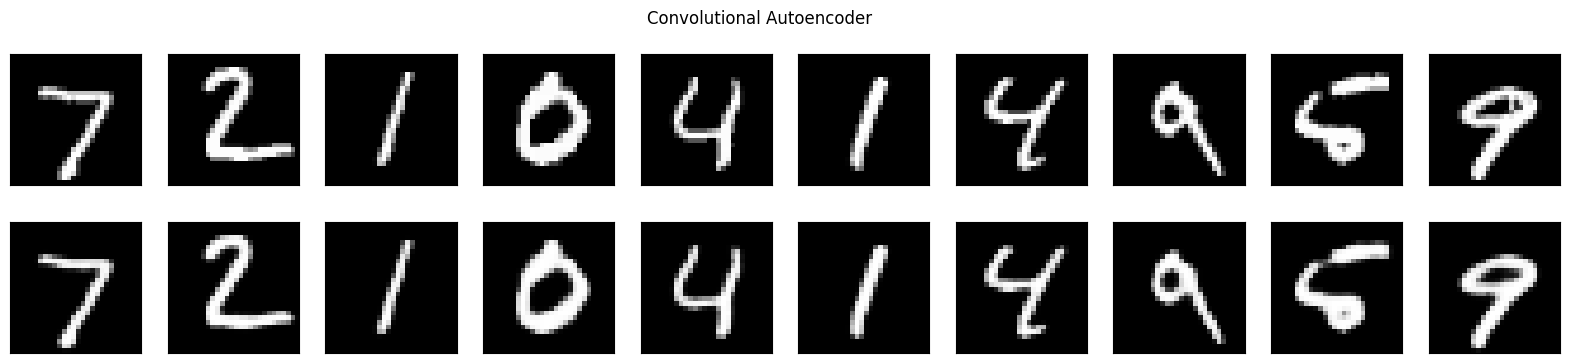

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 gaussian_noise (GaussianNo  (None, 28, 28, 1)         0         
 ise)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0   

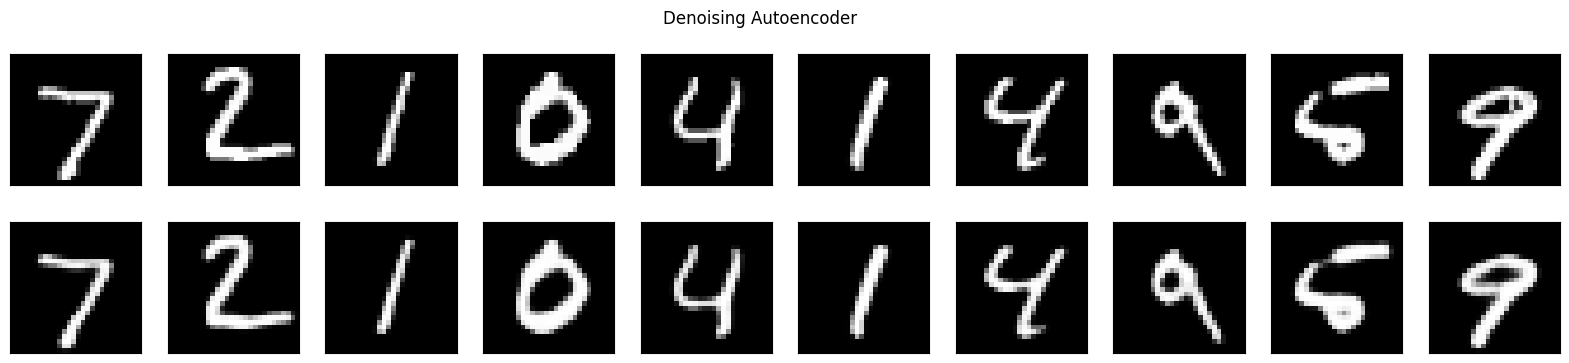

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images into 784-dimensional vectors (for deep autoencoder)
X_train_flat = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test_flat = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Define different autoencoder architectures

# 1. Deep Fully Connected Autoencoder
def deep_autoencoder():
    input_img = Input(shape=(784,))
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(784, activation='sigmoid')(decoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# 2. Convolutional Autoencoder
def convolutional_autoencoder():
    input_img = Input(shape=(28, 28, 1))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# 3. Denoising Autoencoder
def denoising_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    noise = tf.keras.layers.GaussianNoise(0.1)(input_img)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(noise)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Function to train and display results
def train_and_display(autoencoder_func, X_train, X_test, model_name):
    autoencoder = autoencoder_func()
    autoencoder.summary()

    # Train the autoencoder
    autoencoder.fit(X_train, X_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(X_test, X_test))

    # Reconstruct images
    decoded_imgs = autoencoder.predict(X_test)

    # Display original and reconstructed images
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(model_name)
    plt.show()

# Train and display results for each autoencoder architecture
train_and_display(deep_autoencoder, X_train_flat, X_test_flat, "Deep Fully Connected Autoencoder")
train_and_display(convolutional_autoencoder, X_train_conv, X_test_conv, "Convolutional Autoencoder")
train_and_display(denoising_autoencoder, X_train_conv, X_test_conv, "Denoising Autoencoder")